<a href="https://colab.research.google.com/github/tasneemmidhat10/Data-Science-and-Ai/blob/main/NLPwithDisasterTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv')
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.drop('id',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7552 non-null   object
 1   location  5080 non-null   object
 2   text      7613 non-null   object
 3   target    7613 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.0+ KB


In [ ]:
df.drop('location', axis=1, inplace=True)
df.drop('keyword', axis = 1, inplace=True)
df.head(5)

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


In [ ]:
df['target'].value_counts() #There might be a slight class imbalance here

,count
target,
0,4342
1,3271


<Axes: xlabel='target', ylabel='Count'>

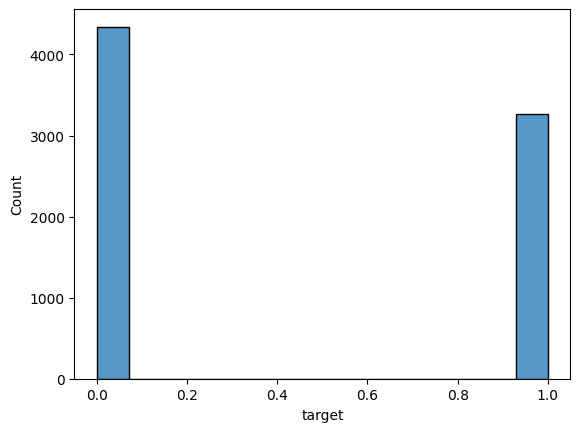

In [ ]:
sns.histplot(df['target'])

In [ ]:
df

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [ ]:
import re

In [ ]:
def prepreocessing(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]+", r" ", text)
    text = re.sub(r'https?://\S+|www\.\S+', r'', text)
    return text

In [ ]:
df1 = df.copy()

In [ ]:
for i in range(len(df1)):
    df1['text'][i] = prepreocessing(df1['text'][i])

In [ ]:
corpus = [ df1['text'][i] for i in range(len(df1))]
corpus[0:10]

['our deeds are the reason of this earthquake may allah forgive us all',
 'forest fire near la ronge sask canada',
 'all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected',
 ' people receive wildfires evacuation orders in california ',
 'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ',
 ' rockyfire update california hwy closed in both directions due to lake county fire cafire wildfires',
 ' flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas',
 'i m on top of the hill and i can see a fire in the woods ',
 'there s an emergency evacuation happening now in the building across the street',
 'i m afraid that the tornado is coming to our area ']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english', analyzer='word')
X = vectorizer.fit_transform(corpus)
X = X.toarray()

In [ ]:
X.shape

(7613, 22101)

In [ ]:
vocab = vectorizer.get_feature_names_out()
len(vocab)

21826

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df1['target'])
le.classes_
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(75,) ,alpha=0.01 ,random_state=1, max_iter=100, early_stopping=True).fit(X, y)

In [ ]:
clf.score(X, y)

0.9022724287403127

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())


0.7178619900034772


In [ ]:
x_test = pd.read_csv('test.csv')
x_test.drop(['id', 'location', 'keyword'], axis = 1, inplace=True)
x_test.head(5)

,text
0,Just happened a terrible car crash
1,"Heard about #earthquake is different cities, s..."
2,"there is a forest fire at spot pond, geese are..."
3,Apocalypse lighting. #Spokane #wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
for i in range(len(x_test)):
    x_test['text'][i] = prepreocessing(x_test['text'][i])


In [ ]:
x_test

,text
0,just happened a terrible car crash
1,heard about earthquake is different cities sta...
2,there is a forest fire at spot pond geese are ...
3,apocalypse lighting spokane wildfires
4,typhoon soudelor kills in china and taiwan
...,...
3258,earthquake safety los angeles safety fasteners...
3259,storm in ri worse than last hurricane my city ...
3260,green line derailment in chicago http t co utb...
3261,meg issues hazardous weather outlook hwo http ...


In [ ]:
vectorizer2 = CountVectorizer(vocabulary=vocab)
X_test = vectorizer2.fit_transform(x_test['text'])
X_test = X_test.toarray()
X_test.shape

(3263, 21826)

In [ ]:
y_test = clf.predict(X_test)
y.shape

(7613,)

In [ ]:
text = x_test['text'][26]
test = prepreocessing(text)
test = vectorizer2.transform([test])
test = test.toarray()
text

' nowplaying alfons ablaze on puls radio pulsradio http t co aa bjgwfdv'

In [ ]:
clf.predict(test)

array([0])

In [ ]:
clf.predict_proba(test)

array([[0.69983945, 0.30016055]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs= -1)
clf2.fit(X, y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
clf2.score(X, y)

0.9956653093392881

In [ ]:
scores2 = cross_val_score(clf2, X, y, cv=5)
print(scores2.mean())

0.6529707860980516
